<a href="https://colab.research.google.com/github/firstiaaa/Pemb_Mesin/blob/main/Pertemuan_9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA  : FIRSTIA AULIA WIDA AZIZAH

KELAS : TI 3H / 2241720135

MACHINE LEARNING PERTEMUAN 9 (Perceptron dan ANN)

In [1]:
# IMPORT LIBRARY

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

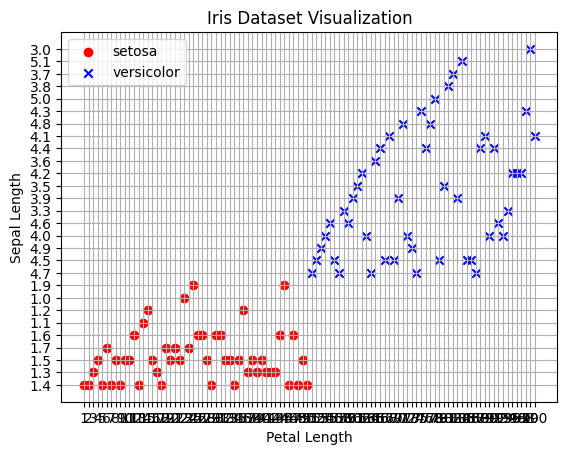

In [8]:
# LOAD DATA DAN VISUALISASI
df = pd.read_csv('/content/drive/MyDrive/P_Mesin/iris.csv', header=None)
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']

# Visualize the data
a, b = 0, 3  # Petal Length vs Sepal Length
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.title('Iris Dataset Visualization')
plt.show()

In [12]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [16]:
# Pilih Data dan Encoding Label

y = df.iloc[0:100, 4].values  # Select 100 rows
y = np.where(y == 'Iris-setosa', -1, 1)  # Change label encoding
X = df.iloc[0:100, [0, 3]].values  # Slice training data


In [17]:
# Fitting Model

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

TypeError: can't multiply sequence by non-int of type 'float'

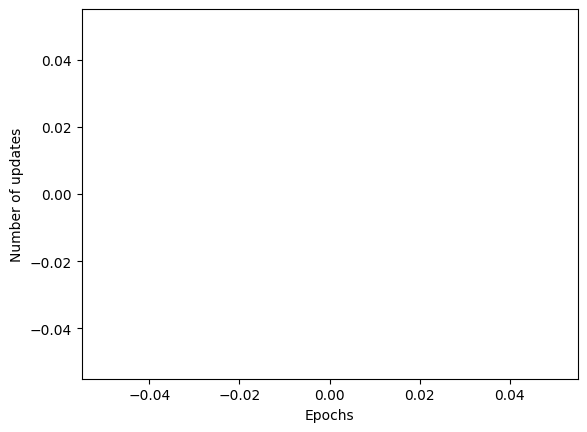

In [18]:
# Visualisasi Nilai Error Per Epoch

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# PRAKTIKUM 2

In [19]:
# Langkah 1 - Import Library

from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [20]:
# Langkah 2 - Pilih Label dan Split Data

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [21]:
# Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Penjelasan :  Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

# PRAKTIKUM 3

Pada kasus sederhana ini menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

In [22]:
# Langkah 1 - Import Library

from sklearn.neural_network import MLPClassifier

In [23]:
# Langkah 2 - Buat Data

y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [24]:
# Langkah 3 - Fit Model

# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [25]:
# Langkah 4 - Prediksi

pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0




```
# This is formatted as code
```

# PRAKTIKUM 4

Pada praktikum kali ini, diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

In [26]:
# Langkah 1 - Import Library

import numpy as np
import pandas as pd
import tensorflow as tf

In [27]:
dataset = pd.read_csv('/content/drive/MyDrive/P_Mesin/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [28]:
# Check Data

print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [29]:
# Langkah 3 - Encoding Data Kategorikal

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [30]:
print (X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [31]:
# Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [32]:
print (X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [33]:
# Langkah 5 - Split Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
# Langkah 6 - Scaling Fitur

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Membuat Model ANN

In [35]:
# Langkah 1 - Inisial Model ANN

ann = tf.keras.models.Sequential()

In [36]:
# Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [37]:
# Langkah 3 - Membuat Hidden Layer Kedua

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [38]:
# Langkah 4 - Membuat Output Layer

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training Model

In [39]:
# Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
# Langkah 2 - Fitting Model

ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4976 - loss: 0.7880
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7980 - loss: 0.4994
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7997 - loss: 0.4629
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7987 - loss: 0.4447
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8015 - loss: 0.4314
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8037 - loss: 0.4224
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8052 - loss: 0.4198
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8004 - loss: 0.4250
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8116 - loss: 0.4067
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8209 - loss: 0.3973
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8165 - loss: 0.4046
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Membuat Prediksi

Diberikan informasi sebagai berikut,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

In [41]:
 # Modelkan Data Baru dan Buat Prediksi

 print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[False]]


Apakah hasilnya False? Benar , hasilnya False

In [42]:
# Prediksi Dengan Data Testing

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [43]:
# Cek Akurasi dan Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1518   77]
 [ 202  203]]


0.8605

# TUGAS

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

Anda diperbolehkan melakukan eksplorasi terhadap,

- Metode pra pengolahan

- Pemilihan fitur

- Arsitektur ANN

- Fungsi Aktiviasi

ANN diimplementasikan dengan menggunakan tensorflow.

- DIKERJAKAN SECARA BERKELOMPOK

- JELASKAN HASIL YANG ANDA DAPATKAN,

- AKURASI

- CONFUSION MATRIX

- KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [44]:
# Langkah 1 - Import Library

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Impor dataset MNIST dari TensorFlow
mnist = keras.datasets.mnist

# Memisahkan dataset menjadi data latih dan data uji
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [45]:
# Pra Pengolahan data dgn ANN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer
    keras.layers.Dropout(0.2),  # Dropout layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


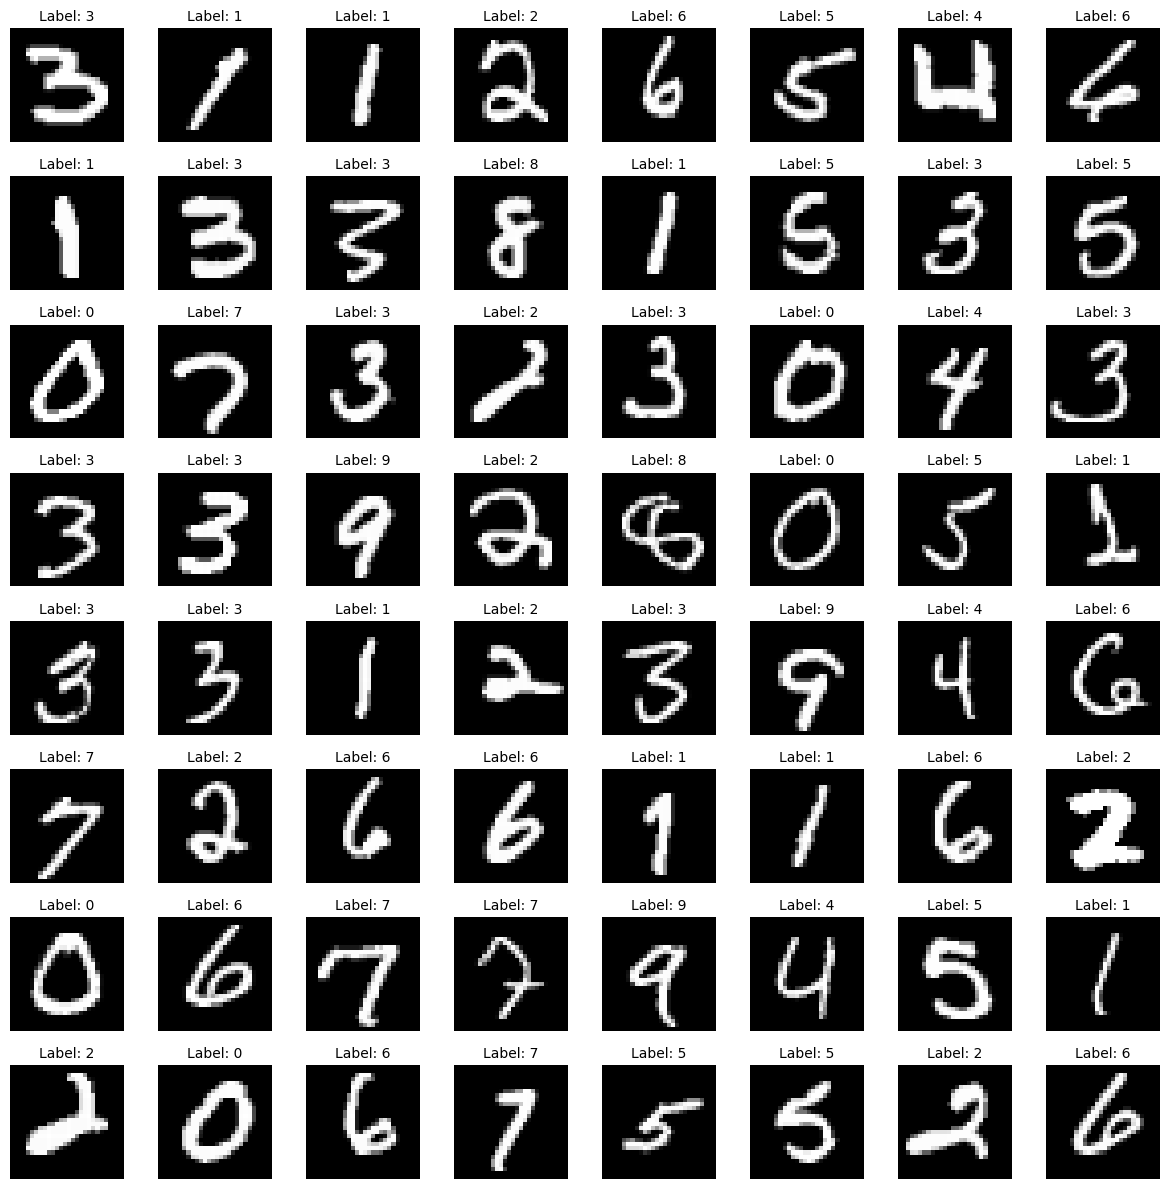

In [46]:
import matplotlib.pyplot as plt

num_images = 64

# Memilih contoh gambar secara acak dari data latih
random_indices = np.random.choice(len(train_images), num_images, replace=False)
sample_images = train_images[random_indices]
sample_labels = train_labels[random_indices]

# Menghitung jumlah baris dan kolom berdasarkan akar kuadrat dari num_images
grid_size = int(np.ceil(np.sqrt(num_images)))

# Menampilkan gambar dalam grid
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(sample_images[i], cmap='gray')
        ax.set_title(f"Label: {sample_labels[i]}", fontsize=10)
        ax.axis('off')

plt.tight_layout()
plt.show()

In [48]:
# Kompilasi Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
# Pelatihan Model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8570 - loss: 0.4809
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9557 - loss: 0.1476
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9661 - loss: 0.1111
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9731 - loss: 0.0881
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9769 - loss: 0.0746
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9797 - loss: 0.0638
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9817 - loss: 0.0540
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9855 - loss: 0.0456
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9851 - loss: 0.0476
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9853 - loss: 0.0428


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.0808
Test accuracy: 0.98
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


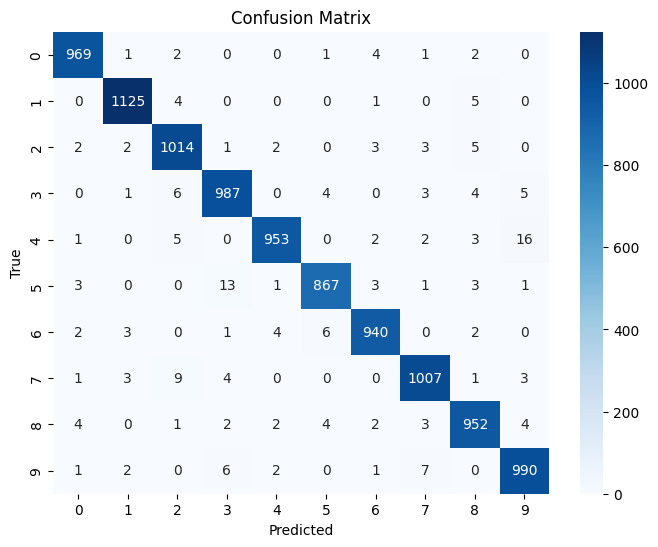

In [56]:
# Confusion Matrix

# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Buat prediksi pada data uji
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Buat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_labels)

# Visualisasi confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()